In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [3]:
# Read in score comparison data
scores = pd.read_csv('score_compare_sample10000.csv')
scores

,head,rel,tail,vec_est_method,actual_score,head_est_score,tail_est_score,both_est_score
0,CID000004927,C0007280,CID000005029,1st eigenvec,0.500455,1.753400,-5.248067,1.101067
1,CID000002083,C0015423,CID000005734,1st eigenvec,-1.837748,1.569798,0.085532,-0.713364
2,CID000004594,C0006444,CID000010631,1st eigenvec,0.426006,0.176106,NaN,NaN
3,CID000002118,C0020538,CID000005358,1st eigenvec,0.125774,-0.367132,0.033011,-0.216429
4,CID000003463,C0012833,CID000004170,1st eigenvec,-0.071318,2.221222,-1.949330,0.016150
...,...,...,...,...,...,...,...,...
49968,CID000004894,C0032617,CID000005090,weighted frechet mean,-0.581488,NaN,-3.207515,NaN
49969,CID000002812,C0017181,CID000003478,weighted frechet mean,-0.528321,-2.747685,-0.891060,-0.671825
49970,CID000003954,C0242184,CID000054454,weighted frechet mean,-0.169197,-0.376839,-1.541073,-0.622509
49971,CID000003878,C0030794,CID000005487,weighted frechet mean,-0.311216,-0.989447,-2.149813,-0.416913


In [7]:
corr_results = []
for method, subdf in scores.groupby('vec_est_method'):
    result = [method]
    for estimated_vec in ['head', 'tail', 'both']:
        col = f'{estimated_vec}_est_score'
        subdf2 = subdf.loc[pd.notna(subdf[col])]
        corr = pearsonr(subdf2['actual_score'], subdf2[col])
        result.append(corr[0])
    corr_results.append(result)
corr_results = pd.DataFrame(corr_results, columns=['vector_method', 'head_corr', 'tail_corr', 'both_corr'])
corr_results.sort_values('head_corr', ascending=False)

,vector_method,head_corr,tail_corr,both_corr
4,mean columns,0.197939,0.235382,0.032161
5,median columns,0.183463,0.208154,0.051002
3,frechet mean,0.167155,0.221889,-0.004407
6,weighted frechet mean,0.164989,0.214764,-0.004929
0,1st eigenvec,0.073275,-0.026770,0.063001
1,Generalised inverse,0.021691,0.083195,0.037438
2,Least squares,0.021691,0.083195,0.037438


# Frechet mean

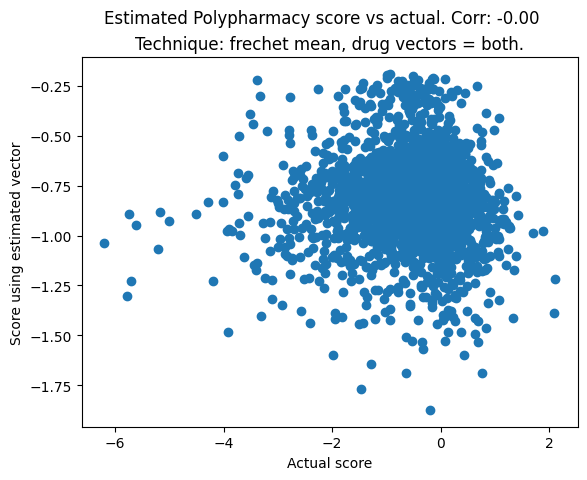

In [6]:
method = "frechet mean"
y_var = 'both_est_score'

frechet = scores.query(f'vec_est_method == "{method}"')
corr_df = frechet.loc[pd.notna(frechet[y_var])]
corr = pearsonr(corr_df[y_var], corr_df.actual_score)

plt.scatter(data=frechet, x='actual_score', y=y_var)
plt.ylabel('Score using estimated vector')
plt.xlabel('Actual score')
plt.suptitle(f'Estimated Polypharmacy score vs actual. Corr: {corr[0]:.2f}')
plt.title(f'Technique: {method}, drug vectors = {y_var.split("_")[0]}.')


plt.show()

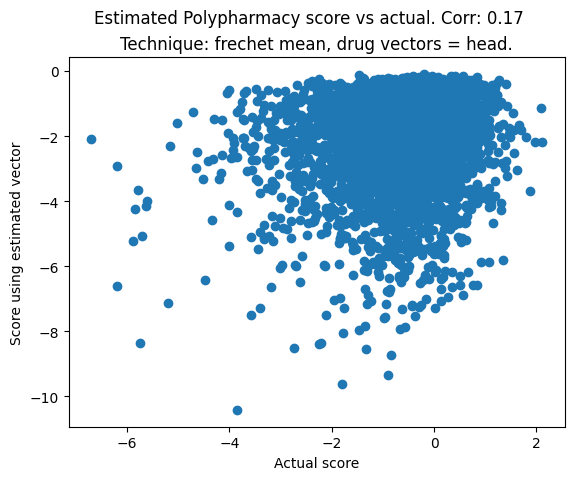

In [7]:
method = "frechet mean"
y_var = 'head_est_score'

frechet = scores.query(f'vec_est_method == "{method}"')
corr_df = frechet.loc[pd.notna(frechet[y_var])]
corr = pearsonr(corr_df[y_var], corr_df.actual_score)

plt.scatter(data=frechet, x='actual_score', y=y_var)
plt.ylabel('Score using estimated vector')
plt.xlabel('Actual score')
plt.suptitle(f'Estimated Polypharmacy score vs actual. Corr: {corr[0]:.2f}')
plt.title(f'Technique: {method}, drug vectors = {y_var.split("_")[0]}.')


plt.show()

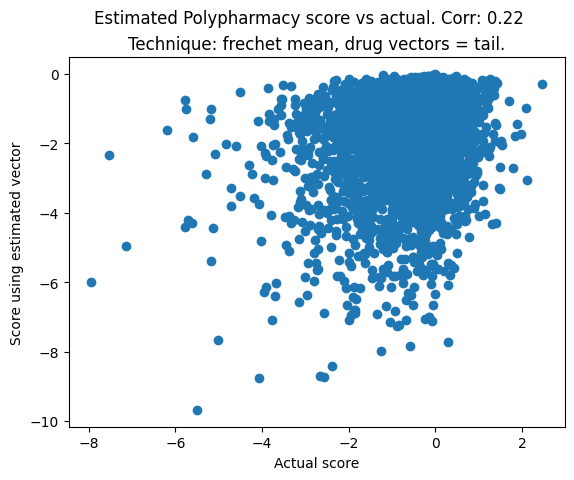

In [8]:
method = "frechet mean"
y_var = 'tail_est_score'

frechet = scores.query(f'vec_est_method == "{method}"')
corr_df = frechet.loc[pd.notna(frechet[y_var])]
corr = pearsonr(corr_df[y_var], corr_df.actual_score)

plt.scatter(data=frechet, x='actual_score', y=y_var)
plt.ylabel('Score using estimated vector')
plt.xlabel('Actual score')
plt.suptitle(f'Estimated Polypharmacy score vs actual. Corr: {corr[0]:.2f}')
plt.title(f'Technique: {method}, drug vectors = {y_var.split("_")[0]}.')


plt.show()

# Weighted Frechet mean

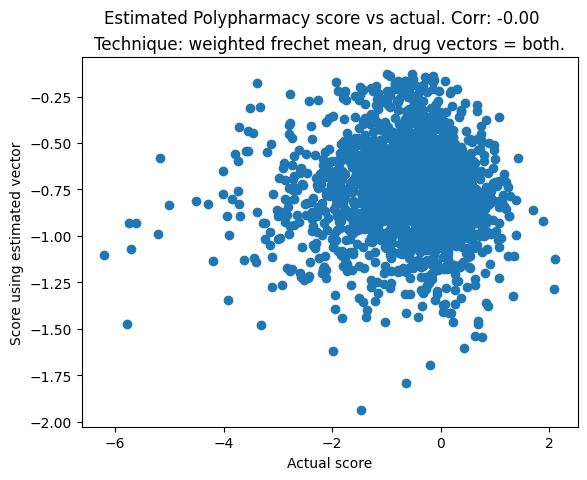

In [9]:
method = "weighted frechet mean"
y_var = 'both_est_score'

frechet = scores.query(f'vec_est_method == "{method}"')
corr_df = frechet.loc[pd.notna(frechet[y_var])]
corr = pearsonr(corr_df[y_var], corr_df.actual_score)

plt.scatter(data=frechet, x='actual_score', y=y_var)
plt.ylabel('Score using estimated vector')
plt.xlabel('Actual score')
plt.suptitle(f'Estimated Polypharmacy score vs actual. Corr: {corr[0]:.2f}')
plt.title(f'Technique: {method}, drug vectors = {y_var.split("_")[0]}.')


plt.show()

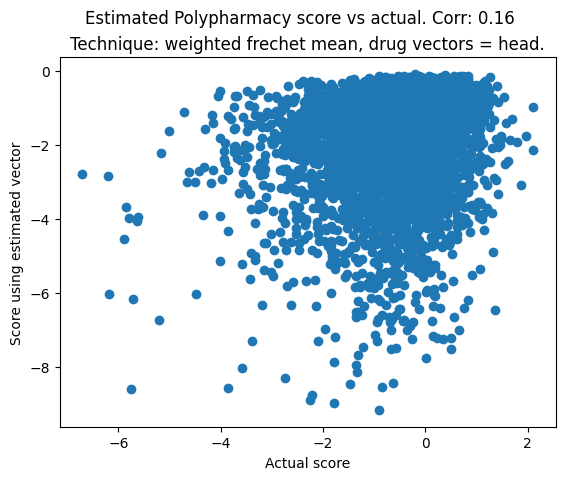

In [10]:
method = "weighted frechet mean"
y_var = 'head_est_score'

frechet = scores.query(f'vec_est_method == "{method}"')
corr_df = frechet.loc[pd.notna(frechet[y_var])]
corr = pearsonr(corr_df[y_var], corr_df.actual_score)

plt.scatter(data=frechet, x='actual_score', y=y_var)
plt.ylabel('Score using estimated vector')
plt.xlabel('Actual score')
plt.suptitle(f'Estimated Polypharmacy score vs actual. Corr: {corr[0]:.2f}')
plt.title(f'Technique: {method}, drug vectors = {y_var.split("_")[0]}.')


plt.show()

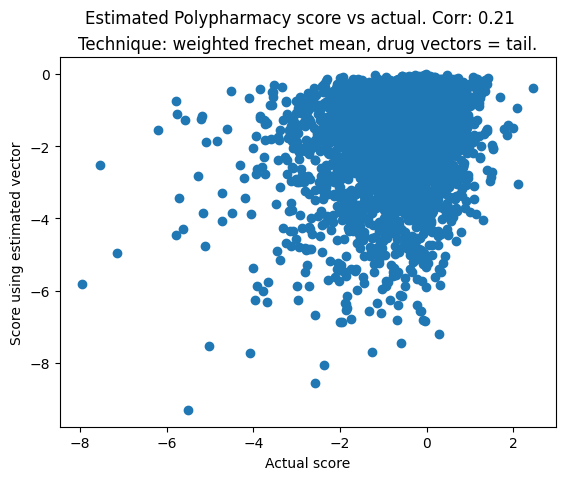

In [11]:
method = "weighted frechet mean"
y_var = 'tail_est_score'

frechet = scores.query(f'vec_est_method == "{method}"')
corr_df = frechet.loc[pd.notna(frechet[y_var])]
corr = pearsonr(corr_df[y_var], corr_df.actual_score)

plt.scatter(data=frechet, x='actual_score', y=y_var)
plt.ylabel('Score using estimated vector')
plt.xlabel('Actual score')
plt.suptitle(f'Estimated Polypharmacy score vs actual. Corr: {corr[0]:.2f}')
plt.title(f'Technique: {method}, drug vectors = {y_var.split("_")[0]}.')


plt.show()